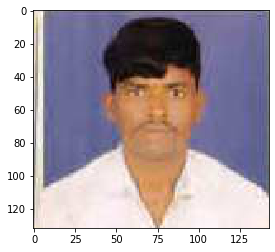

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline       
plt.imshow(mpimg.imread(filenames[0]))

In [1]:
import tensorflow as tf
# import necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import get_file
import numpy as np
import argparse
import cv2
import os
import cvlib as cv
import matplotlib.pyplot as plt
import glob

# download pre-trained model file (one-time download)
dwnld_link = "https://github.com/arunponnusamy/cvlib/releases/download/v0.2.0/gender_detection.model"
model_path = get_file("gender_detection.model", dwnld_link,
                     cache_subdir="pre-trained", cache_dir=os.getcwd())



/Users/shivamralli/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shivamralli/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shivamralli/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shivamralli/anaconda3/lib/python3.7/site-packages/tensorf

In [2]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [3]:
import face_recognition
import os
import glob
from tqdm import tqdm_notebook
from face_recognition.face_recognition_cli import image_files_in_folder
import pandas as pd
import shutil

In [4]:
model = load_model(model_path)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [5]:
classes = ['man','woman']

In [6]:
from PIL import Image

In [7]:
model_res = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [23]:
def man_or_woman(img):
    image = cv2.imread(img)
    face, confidence = cv.detect_face(image)
    for idx, f in enumerate(face):

         # get corner points of face rectangle       
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        #cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(image[startY:endY,startX:endX])

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0]
        idx = np.argmax(conf)
#         print(idx)
        if(classes[idx]=='man'):
            return 'man'
        elif(classes[idx]=='woman'):
            return 'woman'

In [9]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [69]:
root_dir = 'data/missing_images/realigned/'+(str(int(input())))+'.png'
#image_database = sorted(get_file_list(root_dir))
image_database = root_dir

279


In [70]:
image_list=[]
def img_list():
    format_img = ['.png']
    final = []
    for i in format_img:
        image_list = glob.glob('search_space/*.png')


        for j in image_list:
            final.append(j)
#         image_list_1 = glob.glob("data/Want to find/Images/wanted/wanted/*"+i)
#         for k in image_list_1:
#             final.append(k)
    return final
        

In [71]:
import math

In [72]:
def face_distance_to_conf(face_distance, face_match_threshold=0.54):
    if face_distance > face_match_threshold:
        range = (1.0 - face_match_threshold)
        linear_val = (1.0 - face_distance) / (range * 2.0)
        return linear_val
    else:
        range = face_match_threshold
        linear_val = 1.0 - (face_distance / (range * 2.0))
        return linear_val + ((1.0 - linear_val) * math.pow((linear_val - 0.5) * 2, 0.2))

In [73]:
d = {}

## Demo

In [143]:
root_dir = 'data/missing_images/realigned/'+(str(int(input())))+'.png'
#image_database = sorted(get_file_list(root_dir))
image_database = ['IMG_0001#_c3924700-2946-49df-9f67-164dcfe11867894.jpg' , '295-2018#_3eecc73d-3620-4852-861c-7cbc0cd9739b1408.jpg','432-18 - C#_cfa2135d-48c0-4c5c-973b-c06bbbe0956f1414.jpg','CR NO 155-#_098a6be6-cdeb-4078-aecd-37c95bf4fa85612.jpg','Jayanth#_00627cb8-3eda-4a66-b06a-12e88788ed9c1052.jpg','-451#_e0cb383e-a7aa-4af5-a9e1-4ba48c19a9d91356.png', '001#_dee769aa-6df0-4974-a999-c80b0725eaf71661.jpg','2#_1fee1f3c-0b80-4bc8-8846-a8433d5489e52123.jpg','123#_d06f399d-687f-4b25-84c4-53a02e2eb82c2209.jpg','212 001#_a2caf6de-8463-4228-bc57-76ed27ace384140.jpg','New Doc 20#_44b2807a-f538-459c-b3e7-97d319588fcd1818.jpg','scan  174#_e6650619-7c0f-4d6b-b4a8-9453932b9f641382.jpg','PHOTO#_57daa2bd-e1f6-4e2f-bccc-363fac7acdc3738.jpg','CR No 143-#_4e274225-2ea2-4fb7-9f83-57fc3568b4e6744.jpg','CR NO 111 #_f637002c-dff6-4839-83a8-49bd755e5c72273.jpg', '133-18 003#_e78c25c8-e11d-4ea7-994a-8e8bf31bd15b1617.jpg','VINAY KUMA#_a8f59916-c5b5-4351-b5f7-24428360e21b1100.jpg','missinig#_52b563f2-6cd6-4758-b13c-8844f808372f1121.jpg','Cr no 157-#_e5809517-9dbc-45e2-9c16-ce01a9ded7151811.jpg', 'Cr No#_151dffd6-79ec-4352-b5ba-34f9407971be2205.jpg']

1


In [144]:
image_database[0]

'IMG_0001#_c3924700-2946-49df-9f67-164dcfe11867894.jpg'

In [145]:
img = image_database[0]

In [146]:
#for img in tqdm_notebook(image_database):
final=[]
val = man_or_woman(img)
if val=='woman':
    filenames = pickle.load(open('resnet_filenames_woman.pickle', 'rb'))
    feature_list = pickle.load(open('resnet_features_woman.pickle', 'rb'))
elif val=='man':
    filenames = pickle.load(open('resnet_filenames_man.pickle', 'rb'))
    feature_list = pickle.load(open('resnet_features_man.pickle', 'rb'))
feature_of_img = extract_features(img, model_res)
try:
    os.mkdir('search_space')
except:
    pass




from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=100, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_of_img])


for i in range(len(indices[0])):
    img_name = filenames[indices[0][i]]
    img_w = cv2.imread(img_name)
    if val=='woman':
        sp = 'search_space/'+img_name[6:]
    elif val=='man':
        sp = 'search_space/'+img_name[4:]
    #print(sp)
    cv2.imwrite(sp,img_w)

#Exec script:
image_list_f = img_list()

#Extracting known encodings from the subspace we created
known_face_encodings = [] # Create an empty list for saving encoded files
error_images_encoding=[]
known_face_names = []
for i in image_list_f:
    try:
        image_t = face_recognition.load_image_file(i)
        image_encoding = face_recognition.face_encodings(image_t)
        known_face_encodings.append(image_encoding[0]) # Append the results to encoding_for_file list 
        known_face_names.append(i)
    except:
#             print("Error for image", i)
        error_images_encoding.append(image_t)
        continue

test_image = img

#Finding embedding for test image:
find_face_encodings = [] # Create an empty list for saving encoded files
test_error_images_encoding=[]


try:
    image_t = face_recognition.load_image_file(test_image)
    image_encoding = face_recognition.face_encodings(image_t)
    find_face_encodings.append(image_encoding[0]) # Append the results to encoding_for_file list 

except:
    print("Error for image", test_image)
    test_error_images_encoding.append(image_t)
    shutil.rmtree('search_space/')
    pass

for j in find_face_encodings:
    matches = face_recognition.face_distance(known_face_encodings, j)
try: 
    for dist in matches:
        final.append(face_distance_to_conf(dist))
    max_conf_found = max(final)
    matches = list(matches)
    final_img =  known_face_names[final.index(max_conf_found)]
except:
    pass



TypeError: cannot unpack non-iterable NoneType object

In [142]:
plt.imshow(mpimg.imread(img))

FileNotFoundError: [Errno 2] No such file or directory: 'IMG_0001#_c3924700-2946-49df-9f67-164dcfe11867894.jpg'

In [138]:
plt.imshow(mpimg.imread(final_img))

OSError: read past end of file

In [ ]:
shutil.rmtree('search_space/')

In [ ]:
final_img

In [125]:
print(max_conf_found)

0.8178162481659402


In [58]:
k100 = d

In [59]:
k100

{('data/missing_images/realigned/189.png',
  'search_space/ArrestPerson1881.png'): 0.7445903737355364,
 ('data/missing_images/realigned/19.png',
  'search_space/ArrestPerson2012.png'): 0.4434773886590318,
 ('data/missing_images/realigned/190.png',
  'search_space/ArrestPersonArrestPerson2062.png'): 0.4305170109245488,
 ('data/missing_images/realigned/191.png',
  'search_space/ArrestPersonArrestPerson2070.png'): 0.4701479928918749,
 ('data/missing_images/realigned/192.png',
  'search_space/ArrestPerson2012.png'): 0.8451303176385141,
 ('data/missing_images/realigned/193.png',
  'search_space/ArrestPerson1866.png'): 0.44713501133980804,
 ('data/missing_images/realigned/194.png',
  'search_space/ArrestPersonArrestPerson2205.png'): 0.8717384596188611,
 ('data/missing_images/realigned/195.png',
  'search_space/ArrestPersonArrestPerson1942.png'): 0.7995718074071003,
 ('data/missing_images/realigned/196.png',
  'search_space/ArrestPerson1965.png'): 0.49469966290848844,
 ('data/missing_images/r

In [40]:
k = d

In [41]:
k

{('data/missing_images/realigned/0.png',
  'search_space/ArrestPersonArrestPerson2222.png'): 0.8178162481659402,
 ('data/missing_images/realigned/1.png',
  'search_space/ArrestPerson2038.png'): 0.3959403171057841,
 ('data/missing_images/realigned/10.png',
  'search_space/ArrestPersonArrestPerson2117.png'): 0.43550624795404985,
 ('data/missing_images/realigned/100.png',
  'search_space/ArrestPerson2205.png'): 0.42461443228196216,
 ('data/missing_images/realigned/101.png',
  'search_space/ArrestPerson2075.png'): 0.4998287368136688,
 ('data/missing_images/realigned/102.png',
  'search_space/ArrestPersonArrestPerson2163.png'): 0.787394151153229,
 ('data/missing_images/realigned/103.png',
  'search_space/ArrestPersonArrestPerson2163.png'): 0.44088971376315067,
 ('data/missing_images/realigned/104.png',
  'search_space/ArrestPersonArrestPerson2205.png'): 0.7862655789932659,
 ('data/missing_images/realigned/105.png',
  'search_space/ArrestPerson2205.png'): 0.3955674707344235,
 ('data/missing_

In [36]:
shutil.rmtree('search_space/')

In [150]:
val

'woman'

In [151]:
if val=='woman':
    filenames = pickle.load(open('resnet_filenames_woman.pickle', 'rb'))
    feature_list = pickle.load(open('resnet_features_woman.pickle', 'rb'))
elif val=='man':
    filenames = pickle.load(open('resnet_filenames_man.pickle', 'rb'))
    feature_list = pickle.load(open('resnet_features_man.pickle', 'rb'))

In [152]:
feature_of_img = extract_features(img_to_search, model_res)

## Getting n nearest neighbors

In [154]:
os.mkdir('search_space')

In [155]:
%%time

from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=100, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_of_img])

CPU times: user 643 ms, sys: 228 ms, total: 871 ms
Wall time: 1.09 s


In [156]:
indices

array([[ 82, 210, 258,  23,  45,  55, 251, 124,  49, 231,  34, 253,  59,
        125, 256, 103, 203, 238, 207, 239,  99, 235,  89, 119, 197,  29,
        247, 109, 227, 194, 111,  38, 205, 221,  63, 146, 248, 100, 116,
        224, 138, 250,  47,  44, 118, 244,  90, 192, 223,  75, 260,  32,
        106,  95,  39, 255, 236,  27,  97, 145, 222, 150,  50, 242, 104,
         51, 228, 229, 157, 122,  24, 219,  80, 261,  69,  94, 245, 241,
        198, 220, 202, 152, 225,  84, 237, 193, 117, 212, 128, 158,  40,
         92, 214, 246, 217, 252, 160, 127, 121, 200]])

In [157]:
filenames[indices[0][1]]

'woman/ArrestPersonArrestPerson1936.png'

In [158]:
for i in range(len(indices[0])):
    img_name = filenames[indices[0][i]]
    img = cv2.imread(img_name)
    if val=='woman':
        sp = 'search_space/'+img_name[6:]
    elif val=='man':
        sp = 'search_space/'+img_name[4:]
    #print(sp)
    cv2.imwrite(sp,img)